# GibbsSampling

## まず基本の一次元の正規分布を仮定したサンプリング

In [5]:
import scipy.stats as st
from scipy.special import gamma
import numpy as np
import matplotlib.pyplot as plt

mu  = 10
var = 1
X = np.random.normal(loc=mu,scale=np.sqrt(var),size=100)
print(len(X))
print(np.mean(X))
print(np.var(X))

100
9.970305267645687
0.9908130191543123


In [7]:
class GibbsSampling():
    
    def __init__(self,mu,var,alpha,beta):
        self.mu_list = [mu]
        self.var_list = [var]
        self.alpha = alpha/2
        self.beta = beta/2
        
    
    def fit(self,X,burn_in=2000,burn_out=8000):
        n_sample = len(X)
        var_s = np.var(X)
        mu_s  = np.mean(X)
        ite = burn_in+burn_out
        
        for i in range(ite):
            mu_ = self.mu_list[-1]
            var_ = self.var_list[-1]

            mu  = float(np.random.normal((n_sample*mu_s*var_ + mu_*var_s)/(n_sample*var_ + var_s), np.sqrt(var_s*var_/(n_sample*var_ + var_s)), 1))
            
            alpha = (self.alpha + n_sample)/2
            beta  = self.beta + (n_sample*((mu - mu_s)**2 + var_s))/2
            var = float(st.invgamma.rvs(alpha, scale=beta, size=1))
            #var = self.invgamma.rvs(size=1, alpha=alpha, beta=beta)
            
            self.mu_list.append(mu)
            self.var_list.append(var)
            
        mu_list = self.mu_list[burn_in:burn_out]
        var_list= self.var_list[burn_in:burn_out]


In [8]:
#初期値設定
mu0  =0
var0 = 1000
alpha0 = 0
beta0 = 0
burn_in = 20000
burn_out = 180000

gibbs_sampling = GibbsSampling(mu0,var0,alpha0,beta0)
gibbs_sampling.fit(X,burn_in,burn_out)

9.970793454646145


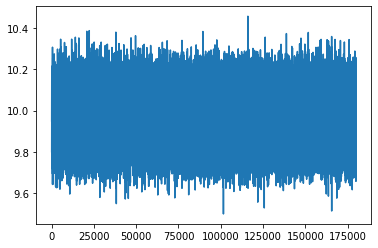

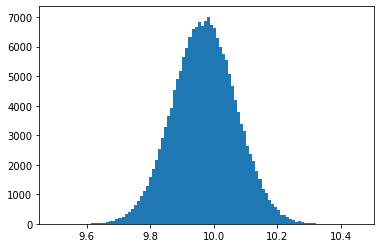

1.0074810318469958


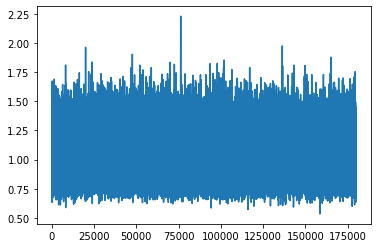

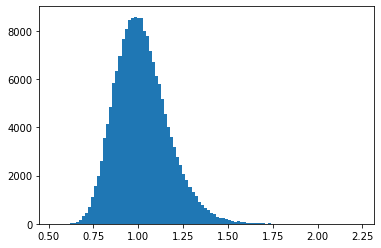

In [9]:
mu_list = gibbs_sampling.mu_list
var_list = gibbs_sampling.var_list
#print(gibbs_sampling.var_list)

print(np.mean(mu_list[burn_in:]))
plt.plot(mu_list[burn_in:])
plt.show()
plt.hist(mu_list[burn_in:],bins=100)
plt.show()

print(np.median(gibbs_sampling.var_list[burn_in:]))
plt.plot(var_list[burn_in:])
#plt.hlines(np.var(X),xmin=0,xmax=200,colors="r")
plt.show()
plt.hist(var_list[burn_in:],bins=100)
plt.show()

In [113]:
class GibbsSampling():
    
    def __init__(self,mu,var,alpha,beta):
        self.mu_list = [mu]
        self.var_list = [var]
        self.alpha = alpha/2
        self.beta = beta/2
        
    
    def fit(self,X,burn_in=2000,burn_out=8000):
        n_sample = len(X)
        var_s = np.var(X)
        mu_s  = np.mean(X)
        ite = burn_in+burn_out
        
        for i in range(ite):
            mu_ = self.mu_list[-1]
            var_ = self.var_list[-1]

            mu  = float(np.random.normal((n_sample*mu_s*var_ + mu_*var_s)/(n_sample*var_ + var_s), np.sqrt(var_s*var_/(n_sample*var_ + var_s)), 1))
            
            alpha = (self.alpha + n_sample)/2
            beta  = self.beta + (n_sample*((mu - mu_s)**2 + var_s))/2
            var = float(st.invgamma.rvs(alpha, scale=beta, size=1))
            #var = self.invgamma.rvs(size=1, alpha=alpha, beta=beta)
            
            self.mu_list.append(mu)
            self.var_list.append(var)
            
        mu_list = self.mu_list[burn_in:burn_out]
        var_list= self.var_list[burn_in:burn_out]


97.18896537348705
96.97867086533319
